# Red de Hopfield



In [1]:
from numpy import array, zeros, dot, zeros_like, ones_like, sign, ones
from numpy.random import random, choice
%matplotlib inline
import matplotlib.pyplot as plt


Creamos un par de patrones a guardar en la red

[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1.]
 [-1.  1. -1. -1. -1. -1.  1. -1.]
 [-1.  1.  1.  1.  1.  1.  1. -1.]]


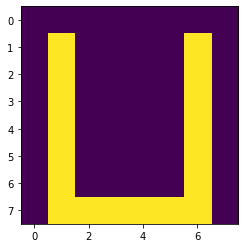

In [2]:
U = ones((8,8))*-1.
U[1:,1] = 1
U[7,1:7] = 1
U[1:,6] = 1
print(U)
plt.imshow(U)

[[-1.  1.  1.  1.  1.  1.  1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


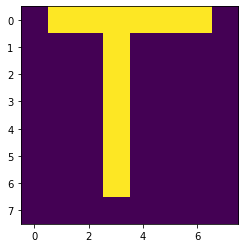

In [3]:
T = ones((8,8))*-1
T[0,1:7] = 1
T[:7,3]=1
print(T)
plt.imshow(T)

In [4]:
t = T.reshape(1,-1)
u = U.reshape(1,-1)
print("Estímulo t")
print(t)
print("Estímulo u")
print(u)
diag = [(i,i) for i in range(64)]

Estímulo t
[[-1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
  -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
Estímulo u
[[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.
  -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
   1. -1. -1.  1.  1.  1.  1.  1.  1. -1.]]


In [5]:
W = (1./8)*t.T*t
print(W.shape)
for c in diag:
    W[c]=0.
print(W.diagonal())

(64, 64)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
W  = W + (1/8.)*u.T*u
for c in diag: 
    W[c] = 0.

[[ 0.    0.    0.   ...  0.    0.    0.25]
 [ 0.    0.    0.25 ... -0.25 -0.25  0.  ]
 [ 0.    0.25  0.   ... -0.25 -0.25  0.  ]
 ...
 [ 0.   -0.25 -0.25 ...  0.    0.25  0.  ]
 [ 0.   -0.25 -0.25 ...  0.25  0.    0.  ]
 [ 0.25  0.    0.   ...  0.    0.    0.  ]]


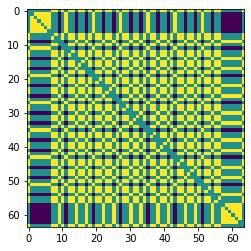

In [7]:
print(W)
plt.imshow(W)

u original
[[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.
  -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
   1. -1. -1.  1.  1.  1.  1.  1.  1. -1.]]
V mutado
[[ 1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
   1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.
  -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.
   1. -1. -1.  1. -1. -1.  1.  1. -1. -1.]]


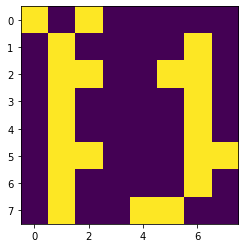

In [8]:
def muta(x, p=0.1):
    v = x.copy()
    for i in range(len(v[0])):
        r = random()
        if(r<p):
            v[0][i] = choice([-1,1])
    return v

#ejemplo
print("u original")
print(u)


v = muta(u, 0.3)
print("V mutado")
print(v)
plt.imshow(v.reshape((8,8)))

[[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.
  -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
   1. -1. -1.  1.  1.  1.  1.  1.  1. -1.]]


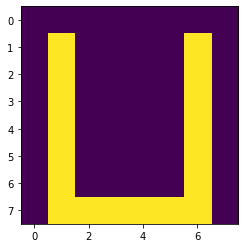

In [9]:
v = sign(v.dot(W))
print(v)
plt.imshow(v.reshape((8,8)))


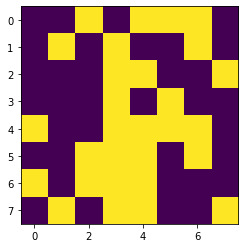

In [10]:
s = muta(t,0.7)
plt.imshow(s.reshape((8,8)))

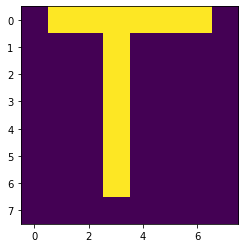

In [11]:
s = sign(s.dot(W))
plt.imshow(s.reshape((8,8)))


## Dinámica

Vamos a ver un ejemplo de la dinámica y la convergencia de estados

In [12]:
W = np.array([[0,1,-1],[1,0,1], [-1,1,0]])
T = np.array([[0.5]*3])

In [105]:
energia = lambda W, t, x: -0.5 * (x.dot(W.dot(x))) + t.dot(x)
e = np.array((1,-1,1))
energia(W,T,e)[0]

3.5

In [106]:
edos = [(x,y,z) for x in (1,-1) for y in (1,-1) for z in (1,-1)]
edos

[(1, 1, 1),
 (1, 1, -1),
 (1, -1, 1),
 (1, -1, -1),
 (-1, 1, 1),
 (-1, 1, -1),
 (-1, -1, 1),
 (-1, -1, -1)]

In [111]:
energias = sorted([(edo, energia(W,T,np.array(edo))[0]) for edo in edos], key=lambda x: x[1])
energias

[((-1, -1, -1), -2.5),
 ((1, -1, -1), -1.5),
 ((-1, -1, 1), -1.5),
 ((1, 1, -1), -0.5),
 ((-1, 1, 1), -0.5),
 ((1, 1, 1), 0.5),
 ((-1, 1, -1), 2.5),
 ((1, -1, 1), 3.5)]

In [113]:
energias = dict( zip(edos,  [energia(W,T,np.array(edo))[0] for edo in edos]))
energias

{(1, 1, 1): 0.5,
 (1, 1, -1): -0.5,
 (1, -1, 1): 3.5,
 (1, -1, -1): -1.5,
 (-1, 1, 1): -0.5,
 (-1, 1, -1): 2.5,
 (-1, -1, 1): -1.5,
 (-1, -1, -1): -2.5}

In [114]:
energias[(1,1,1)]

0.5

In [115]:
import networkx as nx
H = nx.DiGraph()
H.add_nodes_from(edos)

In [117]:
for edo in edos:
    energia_actual = energias[edo]
    print(edo," ", energia_actual)
    for i in range(3):
        candidato = list(edo)
        candidato[i] *= -1
        enrg_candidato = energias[tuple(candidato)]
        if( enrg_candidato < energia_actual):
            print(i," ", candidato, enrg_candidato,"\n")
            H.add_edge(edo, tuple(candidato))

(1, 1, 1)   0.5
0   [-1, 1, 1] -0.5 

2   [1, 1, -1] -0.5 

(1, 1, -1)   -0.5
1   [1, -1, -1] -1.5 

(1, -1, 1)   3.5
0   [-1, -1, 1] -1.5 

1   [1, 1, 1] 0.5 

2   [1, -1, -1] -1.5 

(1, -1, -1)   -1.5
0   [-1, -1, -1] -2.5 

(-1, 1, 1)   -0.5
1   [-1, -1, 1] -1.5 

(-1, 1, -1)   2.5
0   [1, 1, -1] -0.5 

1   [-1, -1, -1] -2.5 

2   [-1, 1, 1] -0.5 

(-1, -1, 1)   -1.5
2   [-1, -1, -1] -2.5 

(-1, -1, -1)   -2.5


{(1, 1, 1): '1 1 1', (1, 1, -1): '1 1 -1', (1, -1, 1): '1 -1 1', (1, -1, -1): '1 -1 -1', (-1, 1, 1): '-1 1 1', (-1, 1, -1): '-1 1 -1', (-1, -1, 1): '-1 -1 1', (-1, -1, -1): '-1 -1 -1'}


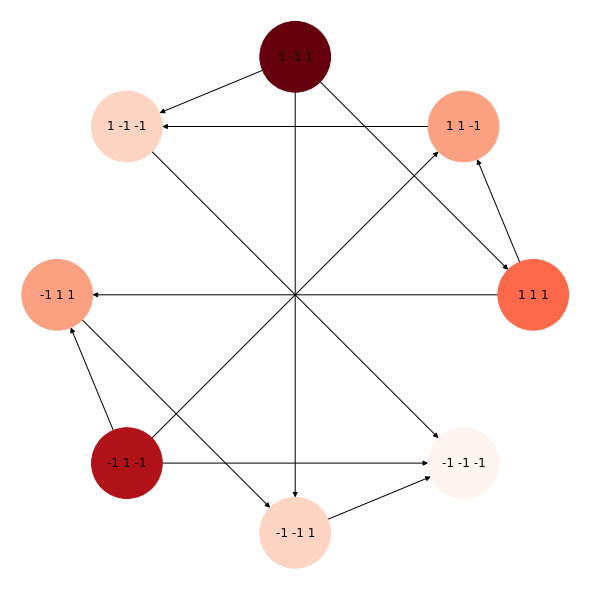

In [118]:
from matplotlib import pyplot as plt
plt.cm
fig =plt.figure(figsize=(8,8))
labels = dict(zip(edos, [' '.join(map(str, edo)) for edo in edos]))

print(labels)
nx.draw_shell(H, 
              node_size=5000, 
              labels=labels, 
              node_color=list(energias.values()),
              cmap=plt.cm.Reds
             )
